# **Task 2: Stock Price Prediction using LSTM**

---



In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

# Load stock data (you can replace 'AAPL' with any stock symbol)
df = yf.download('AAPL', start='2010-01-01', end='2023-01-01')
df = df['Close']

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values.reshape(-1, 1))

# Create training and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=1, batch_size=64)

# Predict and visualize
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - loss: 0.0058
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


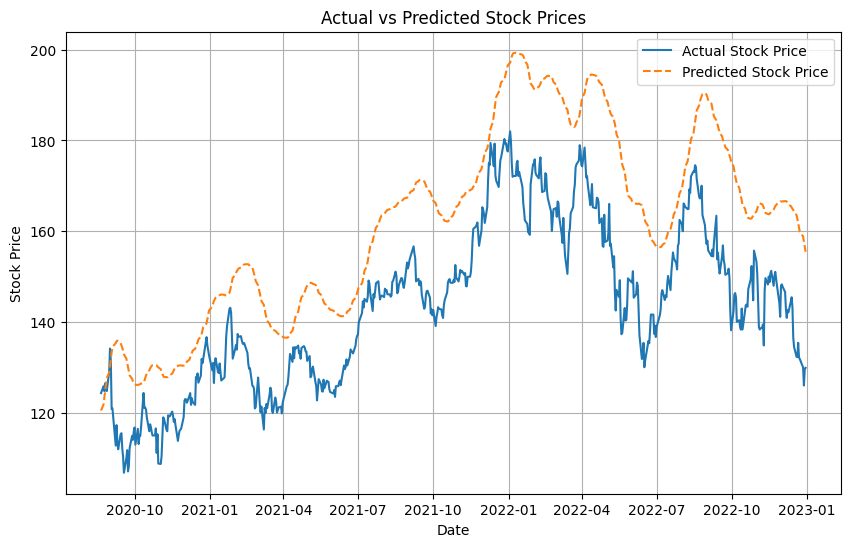

In [2]:
# Plot the results
plt.figure(figsize=(10,6))
plt.plot(df.index[len(df)-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Stock Price')
plt.plot(df.index[len(df)-len(y_test):], y_pred, label='Predicted Stock Price', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

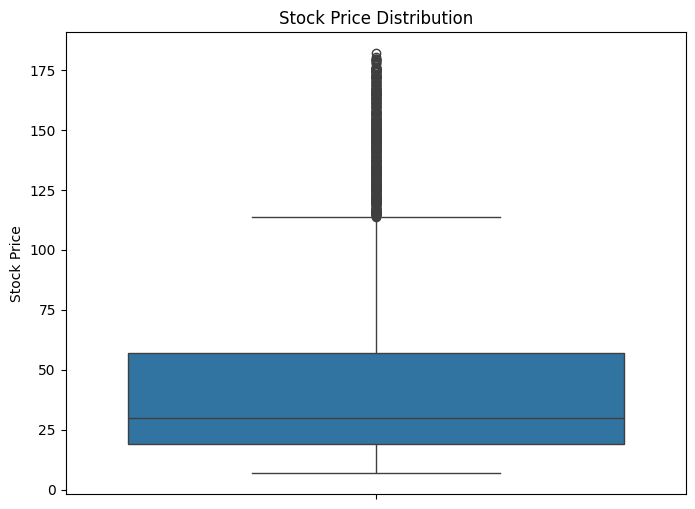

In [6]:
# Box Plot for Stock Price Distribution
!pip install seaborn
import seaborn as sns # import the seaborn library
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.title('Stock Price Distribution')
plt.ylabel('Stock Price')
plt.show()

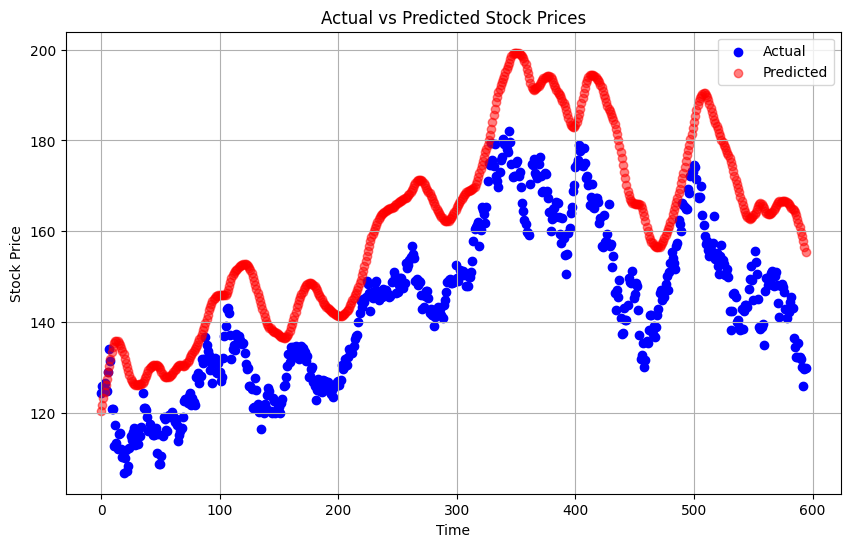

In [7]:
# Scatter Plot for Actual vs Predicted Stock Prices
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), scaler.inverse_transform(y_test), color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
